In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np

## Trying out multiple trajectories with Russ's example code and Pendulum env

In [3]:
# import torch
# torch.manual_seed(1776)

from multiple_traj_opt import (
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
)
from nn_system.networks import *

###############################################
# Construct the inital MathematicalProgram
###############################################
num_trajectories = 1
num_samples      = 15
initial_conditions = (
    None,
#     "1",
#     "2",
#     "3",
)[0]
# seed = 1776
seed = None
mto = MultipleTrajOpt("pendulum",
                      num_trajectories, 
                      num_samples,
                      ic_list=None,
                      warm_start=True,
                      seed=seed)


###############################################
# Add a neural network!
###############################################
# kNetConstructor = lambda: FC(2)
kNetConstructor = lambda: FCBIG(2)
# kNetConstructor = lambda: MLPSMALL(2)
# kNetConstructor = lambda: MLP(2)
reg_type = "No"
# reg_type = "L1"
# reg_type = "L2"
mto.add_nn_params(kNetConstructor,
                  initialize_params = True, 
                  reg_type          = reg_type,
                  enable_constraint = True)

In [4]:
# Introduce a scaling factor in (0, 1] that can be used to shrink the initial
# conditions regions used for policy rollouts, so we can check an area SMALLER
# than that which was used for dircol calculations!
scaling = 0.5
mto.add_multiple_trajectories_visualization_callback(vis_ic_list=None)
mto.add_cost_and_constraint_printing_callback()

there are 2 cbs
 1

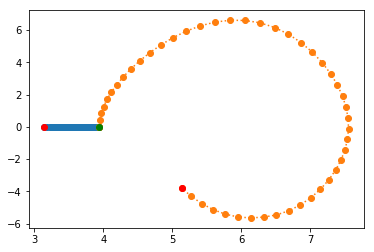

total cost:  0.00 | 	constraint -183.39 	bad 18, -183.95
 3total cost:  0.00 | 	constraint -183.39 	bad 18, -183.96
 5total cost:  0.68 | 	constraint -175.49 	bad 31, -175.61
 7total cost:  6.16 | 	constraint -166.87 	bad 30, -167.16
 9total cost:  6.29 | 	constraint -149.90 	bad 30, -150.03
 11total cost:  32.65 | 	constraint -51.46 	bad 31, -51.66
 13total cost:  26.10 | 	constraint -96.03 	bad 30, -96.15
 15total cost:  23.65 | 	constraint -140.17 	bad 30, -140.20
 17total cost:  23.34 | 	constraint -122.14 	bad 29, -122.30
 19total cost:  23.28 | 	constraint -128.66 	bad 30, -129.03
 21total cost:  23.32 | 	constraint -123.99 	bad 29, -124.17
 23total cost:  23.34 | 	constraint -122.51 	bad 29, -122.67
 25total cost:  23.22 | 	constraint -98.31 	bad 30, -98.64
 27total cost:  23.22 | 	constraint -126.33 	bad 29, -126.58
 29total cost:  23.50 | 	constraint -129.33 	bad 29, -129.32
 31total cost:  23.48 | 	constraint -131.63 	bad 29, -131.67
 33total cost:  23.43 | 	constraint -137.1

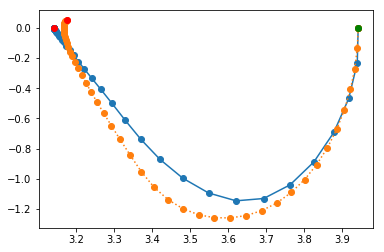

total cost:  23.46 | 	constraint -133.47 	bad 29, -133.52
 37total cost:  23.42 | 	constraint -138.61 	bad 29, -138.65
 39total cost:  23.46 | 	constraint -133.98 	bad 29, -134.03
 41total cost:  23.45 | 	constraint -134.74 	bad 29, -134.79
 43total cost:  23.45 | 	constraint -134.29 	bad 29, -134.34
 45total cost:  23.44 | 	constraint -136.17 	bad 29, -136.20
 47total cost:  23.45 | 	constraint -134.55 	bad 29, -134.59
 49total cost:  23.45 | 	constraint -134.36 	bad 29, -134.40
 51total cost:  23.45 | 	constraint -134.41 	bad 29, -134.46
 53total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 55total cost:  23.45 | 	constraint -134.38 	bad 29, -134.43
 57total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 59total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 61total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 63total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 65total cost:  23.73 | 	constraint -156.76 	bad 30, -156.85
 67total cost:  23.45 | 	co

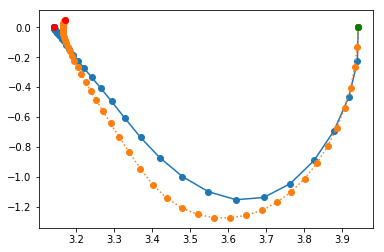

total cost:  23.45 | 	constraint -134.47 	bad 29, -134.52
 71total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 73total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 75total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 77total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 79total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 81total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 83total cost:  23.45 | 	constraint -134.37 	bad 29, -134.42
 85total cost:  23.58 | 	constraint -139.40 	bad 29, -139.50
 87total cost:  23.44 | 	constraint -135.44 	bad 29, -135.50
 89total cost:  23.43 | 	constraint -136.09 	bad 30, -136.17
 91total cost:  23.80 | 	constraint -133.88 	bad 30, -134.25
 93total cost:  23.45 | 	constraint -135.24 	bad 30, -135.44
 95total cost:  23.42 | 	constraint -135.70 	bad 30, -135.83
 97total cost:  23.37 | 	constraint -133.02 	bad 30, -133.04
 99total cost:  24.77 | 	constraint -105.33 	bad 30, -105.57
 101total cost:  23.30 | 	c

In [ ]:
result = mto.Solve()
print(result)

In [ ]:
ti = 0    
mto.print_pi_divergence(ti)

In [ ]:
ti = 0
mto.plot_policy("state_scatter", ti)

In [ ]:
ti = 0
mto.render_policy(ti)

In [ ]:
mto.plot_all_trajectories("state_scatter")
mto.plot_all_trajectories("state_quiver")
mto.plot_all_trajectories("tip_scatter")
mto.plot_all_trajectories("tip_quiver")

### Visualize the found trajectories

In [ ]:
ti = 0
mto.plot_single_trajectory(ti, "state_scatter")
mto.plot_single_trajectory(ti, "state_quiver")
mto.plot_single_trajectory(ti, "tip_scatter")
mto.plot_single_trajectory(ti, "tip_quiver")

mto.render_single_trajectory(ti)